In [2]:
from IPython.display import Image
import numpy as np
from sklearn.manifold import TSNE
import io
import base64
from IPython.display import clear_output
from IPython.display import HTML
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import time
import csv


def draw_scatter_plot(*args, clusters=None, color=None, labels=None, title="", size=5):
    """draw_scatter_plot(data1, data2, color=["color1", "color2"], labels=["label1", "label2"])
    draw_scatter_plot(dataset, 2, color=["color1", "color2"], ...)
    draw_scatter_plot(tsne_lda, clusters=topic_num)"""
    n_of_datasets = args[-1]
    if(isinstance(n_of_datasets, int) and len(args)-1 == 1 and clusters is None):
        #podział args na n_of_datasets czesci
        dataset = to_point_list(args[0])
        jump = (len(dataset)+1) // n_of_datasets 
        data_list = [dataset[begin:begin+jump] for begin in range(0, len(dataset), jump)]  
    elif(not isinstance(n_of_datasets, int) and clusters is None):
        data_list = list(args)
        n_of_datasets = len(args)
    elif(not isinstance(n_of_datasets, int) and clusters is not None):
        n_of_datasets = len(args)
        data_list = ([c for c in args[0]])
        color = cm.rainbow(np.linspace(0, 1, np.max(clusters)+1))
        sortList = list(zip(data_list,clusters))
        def sortKey(val):
            return val[1]
        sortList.sort(key=sortKey)
        iterVal = sortList[0][1]
        data_list = []
        local_data_list = []
        for pointData in sortList:
            if(pointData[1] == iterVal):
                # 1 color
                local_data_list.append(pointData[0])
            else:
                # 2nd color
                iterVal = pointData[1]
                data_list.append(local_data_list)
                local_data_list = []
                local_data_list.append(pointData[0])
        data_list.append(local_data_list)
        data_list = np.array(data_list)
        n_of_datasets = len(data_list)
        #print("n_of_datasets", n_of_datasets)
        #print("color", len(color))
    else: 
        raise BaseException("wrong data input format, diferent input :(")
    if(color is None or len(color) != n_of_datasets):
        if(color is not None and len(color) != n_of_datasets): print("WARNING: wrong color format, overwriting")
        color = cm.rainbow(np.linspace(0, 1, n_of_datasets))
        color = [[c] for c in color]
    show_legend = True
    if(labels is None): 
        labels = [" "] * n_of_datasets
        show_legend = False
    #if(clusters is not None and labels is not None):
        
    # data_list - list of datasets; 
    dims = len(to_1dim_list(data_list[0]))
    #print(dims)
    for data in data_list:
        if(dims != len(to_1dim_list(data))): raise BaseException("wrong data format, diferent dimensions :(")
    plt.figure();
    if(dims == 3): ax = plt.subplot(111, projection='3d')
    #print(len(data_list), len(color))
    for ind, data in enumerate(data_list):
        points = to_1dim_list(data)
        if(dims == 1): 
            plt.scatter(points[0], [0]*len(points[0]), c=color[ind], s=size, label=labels[ind]);
        elif(dims == 2):
            plt.scatter(points[0], points[1], c=color[ind], s=size, label=labels[ind]);
        elif(dims == 3):
            ax.scatter3D(points[0], points[1], points[2], c=color[ind], s=size, label=labels[ind])
        else:
            raise BaseException("wrong data format :(")
        
    plt.title(title);
    if(show_legend): plt.legend();
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.show();
    
    
def to_1dim_list(point_list, force = False):
  # [(x1,y1,..),(x2,y2,...),(x3,y3,..)] ==>> [[x1,x2,x3,...],[y1,y2,...],...]
    if(force): return list(zip(*point_list))
    if(isinstance(point_list[0], int)): return [point_list]
    if(len(point_list) > len(point_list[0])):
        return list(zip(*point_list))
    else:
        return point_list

In [65]:
## przygotowanie danych - 3000 punktów


input_file = "fmnist_70k_784_largevis_with_labels.txt" 
output_file = "fmnist_1000_784.txt" 
num_points = 1000
num_dims = 784

infile = open(input_file, "r")
outfile = open(output_file, "w+")
label_file = "labels_" + output_file
labelfile = open(label_file, "w+")

counter = 0
outfile.write(str(num_points) + " " + str(num_dims))

lines = infile.readlines()
for line in lines[1:]:
    label = line[-3:]
    digit = label.strip()
    digit_int = int(digit, 10)

    txt = line.split(' ')[:num_dims]
    fin = "\n" + " ".join(txt)

    outfile.write(fin)
    labelfile.write(digit + "\n")
    counter = counter + 1
    if (counter == num_points):
        break
            
infile.close()
outfile.close()
labelfile.close()

In [66]:

infile = open("fmnist_1000_784.txt", "r")
lines = infile.readlines()
final = []
for line in lines[1:]:
    line = line.split(' ')
    line[-1] = line[-1].strip()
    for i, item in enumerate(line):
        line[i] = float(item)
    final.append(line)
infile.close()

In [67]:
# tSNE - wygenerowanie danych:
print("tSNE - exact:")
X = np.array(final)
tsne_model = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, method='exact')
start = time.time()
tsne_data = tsne_model.fit_transform(X)
end = time.time()
print( (end - start)/60 )



# #bhSNE:
# print("Barnes-Hut:")
# X = np.array(final)
# bh_sne_model = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, method='barnes_hut')
# start = time.time()
# X_embedded_bh = bh_sne_model.fit_transform(X)
# end = time.time()
# print( (end - start)/60 )

tSNE - exact:
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.599573
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.115056
[t-SNE] KL divergence after 300 iterations: 0.712185
0.18606258233388265


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

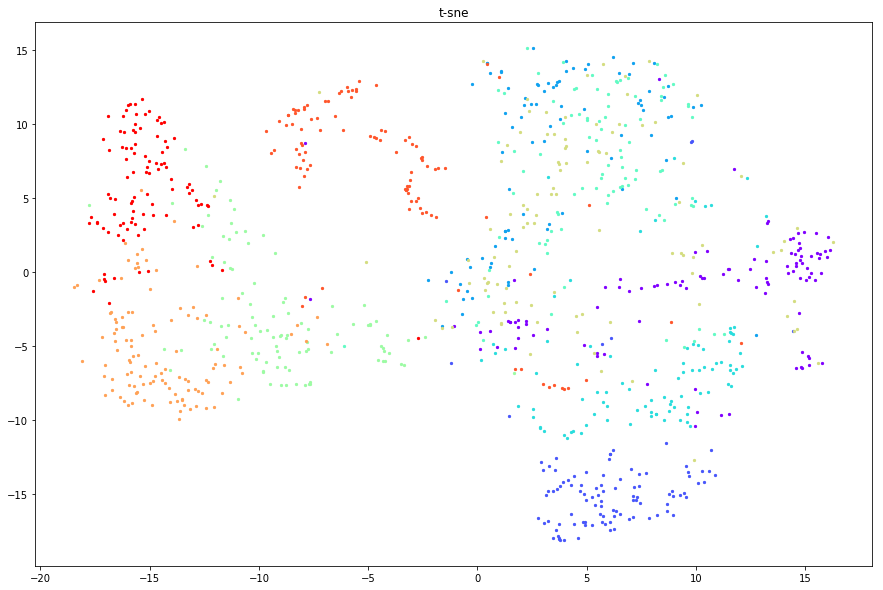

In [68]:
# Wizualizacja tSNE:
labelfile = open("labels_fmnist_1000_784.txt", "r")
lines = labelfile.readlines()
labels = []
for line in lines:
    line = int(line[:-1])
    labels.append(line)
labelfile.close()

draw_scatter_plot(tsne_data, clusters=labels, title="t-sne")

#opcjonalnie bhnse
#draw_scatter_plot(X_embedded_bh, clusters=labels, title="bh-sne")

In [74]:
## zapisanie węzłów i krawędzi do plików CSV - do późniejszego importu w Gephi

nodes = [['id', 'INTEGER label']]

nodes_x_y = [['id', 'INTEGER label', 'DOUBLE x', 'DOUBLE y']]

counter = 1


from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array(tsne_data)
nbrs = NearestNeighbors(n_neighbors=5, algorithm='kd_tree', radius=100).fit(X)

print(nbrs)

matrix = nbrs.kneighbors_graph(X).toarray()

indexes = np.array([list(range(1,len(matrix)+1))])
matrix = np.concatenate((indexes,matrix))

the_list = np.array([[x] for x in range(0,len(matrix))])

print(tsne_data)

print(len(the_list)," ", len(matrix))

result_array = np.append(the_list, matrix, axis=1)


print(result_array)
# for i in range(1,100):
#     np.insert(matrix[i], 0, i)


# print(matrix)

print(matrix[3])

    
    
with open('matrix.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(result_array)

csvFile.close()



for label in labels:
    nodes.append([counter, label])
    counter = counter + 1 
    
counter = 1    
    
for location in tsne_data:   
    [source, target] = location
    nodes_x_y.append([counter, labels[counter-1], source, target])
    counter = counter + 1 


with open('nodes.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(nodes)

csvFile.close()

with open('nodes_x_y.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(nodes_x_y)
    
csvFile.close()

    
    



NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=100)
[[-15.764839    6.7779107]
 [ 15.892491    1.4353065]
 [  1.7138994  -5.1013064]
 ...
 [  0.7313523  -4.8452115]
 [-15.112464    7.1297407]
 [ -7.2190924   9.641298 ]]
1001   1001
[[   0.    1.    2. ...  998.  999. 1000.]
 [   1.    1.    0. ...    0.    1.    0.]
 [   2.    0.    1. ...    0.    0.    0.]
 ...
 [ 998.    0.    0. ...    1.    0.    0.]
 [ 999.    0.    0. ...    0.    1.    0.]
 [1000.    0.    0. ...    0.    0.    1.]]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

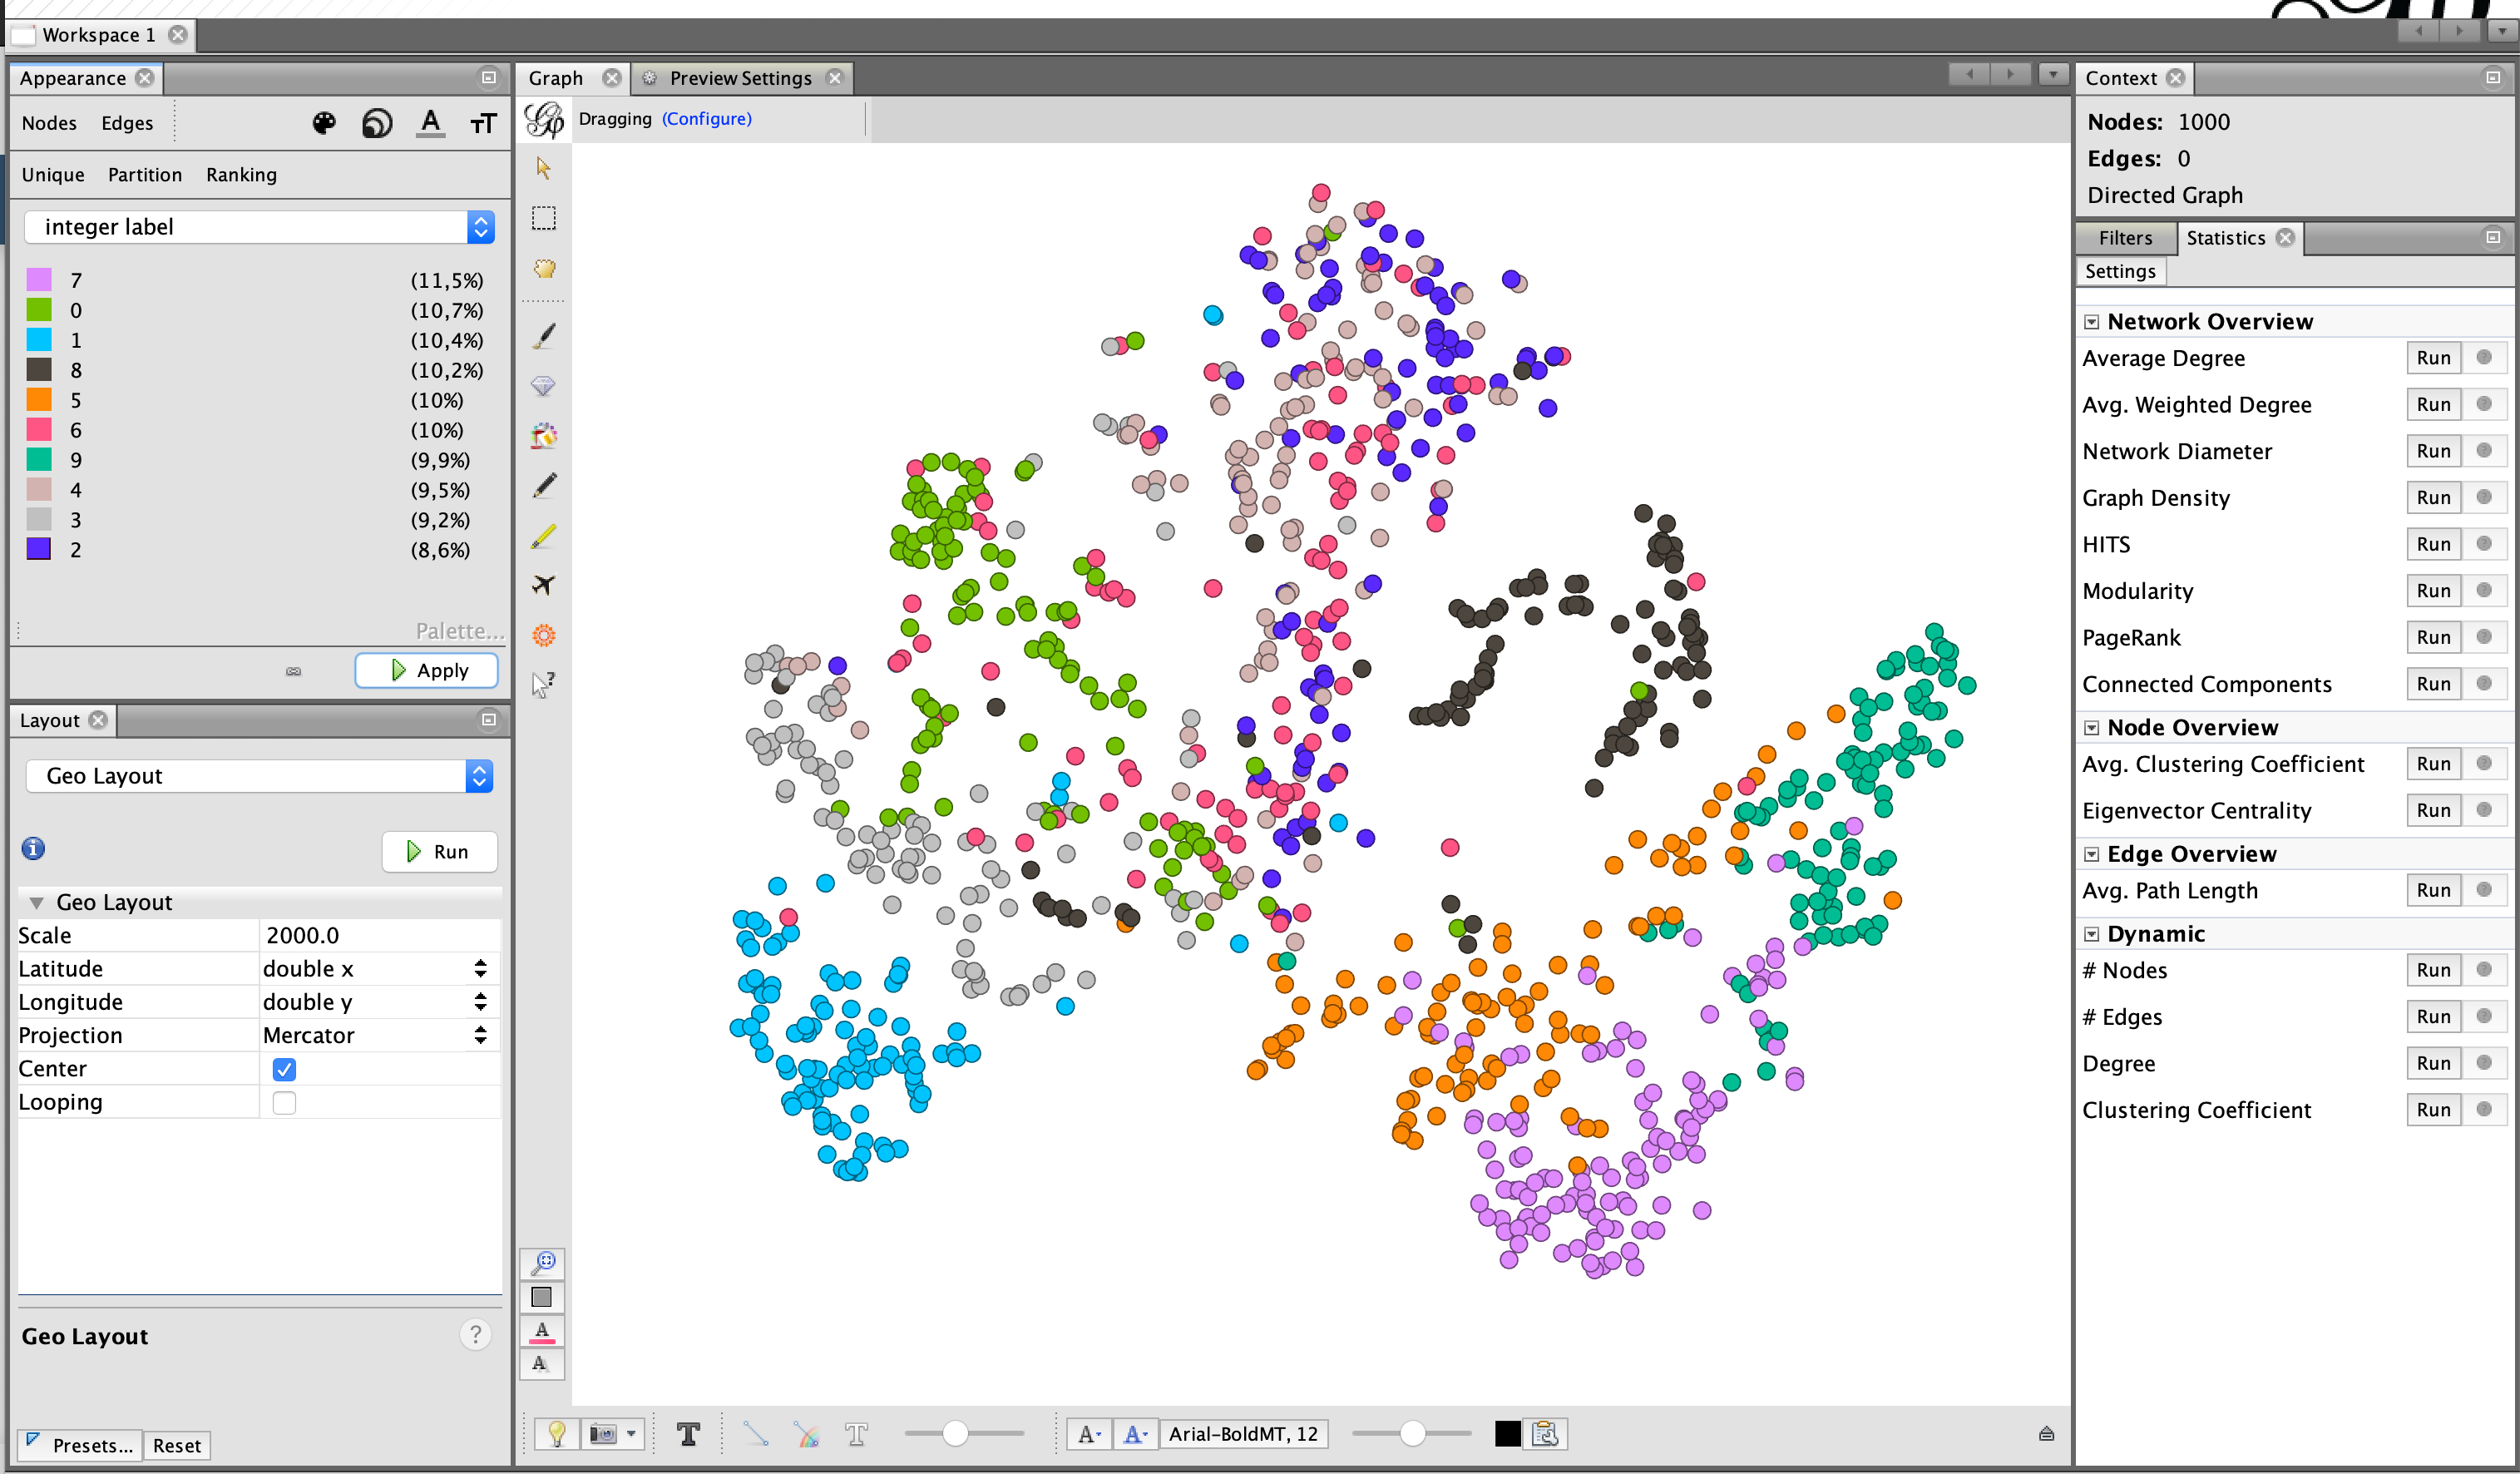

In [18]:
## Gephi - sample from the data - not configured, not optimized :D 

Image("./gephi-sample.png")